In [1]:
#considered 2 podcast of same size to cpmpare the word freuquency distribution
#null hypothesis is:- word frequency distribution is dependent on  the size of the podcast
#alternate hypothesis is :- word frequency distribution  is independednt of the size of the podcast

In [17]:
import glob
import os
import nltk
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [18]:
import nltk
import nltk.tokenize 
import collections
import numpy as np
from collections import Counter

#using nltk to remove stop words  and form a excel sheet.

In [19]:
results = []
import pandas as pd
for folderName,subfolders,fileName in os.walk('C:\\Users\\Harini\\hypothesis'):
       for file in fileName:
            if  file.endswith(".txt"):
                scrubbed = []
                # file in the format of ID_Name_Date_TopicName.txt
                value0, value1, value2,value3,*extraWords = file.split('_')
                file = open(os.path.join(folderName,file),'rt')
                text = file.read() 
                tokens = word_tokenize(text)
                tokens = [w.lower() for w in tokens]
                table = str.maketrans('', '', string.punctuation)
                stripped = [w.translate(table) for w in tokens]
                words = [word for word in stripped if word.isalpha()]
                stop_words = set(stopwords.words('english'))
                #removing the stop words 
                words = [w for w in words if not w in stop_words]
                scrubbed.append(words)
                value4 = words
                #value5 needs to be changed based on the source
                #value5 = 'gcsst'
                rows = (value0,value1,value2,value3,value4)
                results.append(rows)            

labels = ['ID','Name','Date','topicName','scrubbedtext']
PodKnow_Data = pd.DataFrame.from_records(results, columns= labels)
print(PodKnow_Data)
PodKnow_Data.to_csv(r'PodKnow_Data.csv')

           ID                          Name             Date  \
0  1455668750  JensenAndHolesTheMurderSquad   September92019   
1   160904630                 TEDTalksDaily  September172019   

                                           topicName  \
0                       IsNealFallsASerialKiller.txt   
1  HowweuseastrophysicstostudyearthboundproblemsF...   

                                        scrubbedtext  
0  [exactly, right, know, spotify, used, car, get...  
1  [ted, talk, features, urban, astrophysicist, f...  


In [20]:
from scipy.stats import poisson
import seaborn as sb
#import seaborn as sns
import scipy.stats as stats


#trying to fit the word frequency 
for i in range (0,len(PodKnow_Data['scrubbedtext'])):
    counts= list(collections.Counter(PodKnow_Data['scrubbedtext'][i]).most_common(1000))
    df = pd.DataFrame(counts, columns=['word', 'frequency'])
    s = np.array(df['frequency'])
    print(np.mean(s))
   
    

7.062
1.3516483516483517


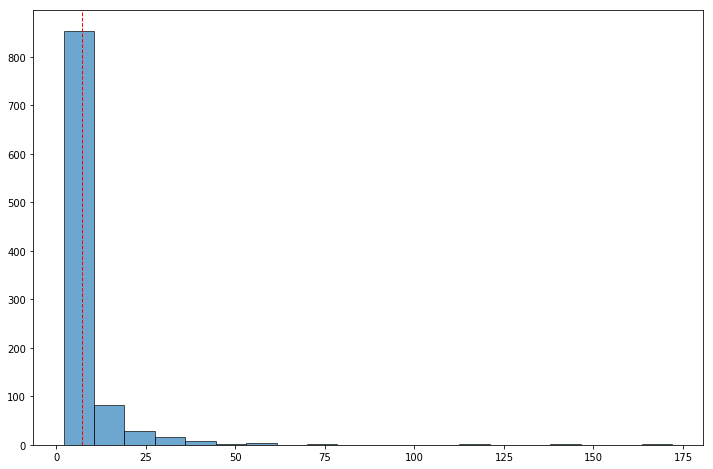

In [11]:
import matplotlib.pyplot as plt
counts1= list(collections.Counter(PodKnow_Data['scrubbedtext'][0]).most_common(1000))
df1 = pd.DataFrame(counts1, columns=['word', 'frequency1'])
s1 = np.array(df1['frequency1'])
mean1= df1['frequency1'].mean()
plt.figure(figsize=(12,8))
plt.hist(s1, bins=20, edgecolor='k', alpha=0.65)
plt.axvline(s1.mean(), color='r', linestyle='dashed', linewidth=1)

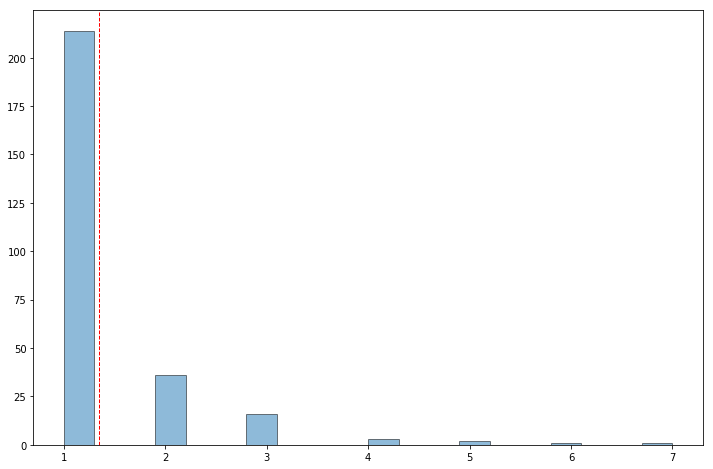

In [21]:
counts2= list(collections.Counter(PodKnow_Data['scrubbedtext'][1]).most_common(1000))
df2= pd.DataFrame(counts2, columns=['word', 'frequency2'])
s2 = np.array(df2['frequency2'])
mean2= df2['frequency2'].mean()
plt.figure(figsize=(12,8))
plt.hist(s2, bins=20, edgecolor='k', alpha=0.5)
plt.axvline(s.mean(), color='r', linestyle='dashed', linewidth=1)

In [69]:
#we see slight variation in the mean of frequency of words of a same size file.
#lets apply the test for checking if size is independent of the mean of  frequency of words

In [22]:
common_words = pd.merge(df1, df2, on='word', how='inner')

In [23]:
common_words

,word,frequency,frequency2
0,nt,172,1
1,know,146,2
2,like,120,3
3,would,60,1
4,back,50,1
5,time,50,2
6,go,44,2
7,could,44,1
8,one,42,1
9,also,34,1


In [25]:
s1 = common_words['frequency']
s2= common_words['frequency2']

In [28]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [29]:
stats.ttest_ind(a= s1,
                b= s2)

Ttest_indResult(statistic=5.769993570618804, pvalue=3.924198319294927e-08)